In [226]:
import pandas as pd
import numpy as np
import wordcloud
import spacy
import nltk
import matplotlib.pyplot as plt
from scipy import stats
from gensim.utils import tokenize
from nltk.corpus import stopwords
from collections import Counter
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

In [200]:
df = pd.read_parquet('data/steam_reviews.parquet')

In [201]:
df_2020 = df[(df["timestamp_updated"] >= 1577836800) & (df["timestamp_updated"] < 1609455600)]

In [202]:
df_2020

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
9522,292030,The Witcher 3: Wild Hunt,83685134,english,True to the reviews so far. Not going to argue...,1609454936,1609454936,True,0,0,...,True,False,False,76561199118693555,2,1,5430.0,2602.0,553.0,1.611370e+09
9524,292030,The Witcher 3: Wild Hunt,83684683,english,all,1609454438,1609454438,True,0,0,...,True,False,False,76561198337484590,9,3,4747.0,987.0,1852.0,1.611348e+09
9528,292030,The Witcher 3: Wild Hunt,83684226,english,I want to hug people who made this game.,1609453963,1609453963,True,1,0,...,True,False,False,76561198006772337,183,18,5997.0,2385.0,908.0,1.611333e+09
9530,292030,The Witcher 3: Wild Hunt,83683979,english,visuals are nice gameplay also nice good game ...,1609453710,1609453710,True,0,0,...,False,False,False,76561198962975529,5,2,576.0,0.0,472.0,1.609618e+09
9532,292030,The Witcher 3: Wild Hunt,83683722,english,k\n,1609453449,1609453449,True,0,0,...,True,False,False,76561199027580016,8,2,273.0,1.0,268.0,1.610960e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747364,546560,Half-Life: Alyx,65645167,english,best game ever\n,1584986750,1584986750,True,0,0,...,True,False,False,76561198817267089,86,8,1055.0,14.0,45.0,1.611138e+09
21747366,546560,Half-Life: Alyx,65645125,english,Holy balls,1584986704,1584986704,True,0,0,...,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,1.586628e+09
21747367,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",1584986693,1584986693,True,0,0,...,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,1.611080e+09
21747368,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,1584986673,1584986673,True,0,0,...,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,1.591634e+09


In [203]:
df["author.playtime_forever"][df["author.steamid"] == 76561198176379749]

495188       77574.0
1417714     253561.0
2311239       9118.0
5420124        920.0
12945423      3969.0
17897046     24105.0
18395131     10845.0
21747368      2654.0
Name: author.playtime_forever, dtype: float64

In [204]:
df[df["author.steamid"] == 76561198176379749]

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
495188,70,Half-Life,56653610,english,"Very fun, fast paced, good story, reccomended",1573074576,1573074576,True,0,0,...,True,False,False,76561198176379749,79,17,77574.0,148.0,70991.0,1.610909e+09
1417714,4000,Garry's Mod,18667038,english,It's been over 6 years since I got this game a...,1445728418,1611067067,True,0,0,...,True,False,False,76561198176379749,79,17,253561.0,1.0,253561.0,1.610130e+09
2311239,264710,Subnautica,75698968,english,no more hands,1599659649,1599659649,True,0,0,...,True,False,False,76561198176379749,79,17,9118.0,0.0,8963.0,1.603762e+09
5420124,782330,DOOM Eternal,67414340,english,"Probably most fun fps game ever, the only down...",1587019702,1587019702,True,0,0,...,True,False,False,76561198176379749,79,17,920.0,0.0,918.0,1.587281e+09
12945423,271590,Grand Theft Auto V,68847689,english,fun,1589032371,1589032371,True,0,0,...,True,False,False,76561198176379749,79,17,3969.0,0.0,2003.0,1.608919e+09
17897046,394360,Hearts of Iron IV,67918164,english,cool,1587712786,1587712786,True,0,0,...,False,False,False,76561198176379749,79,17,24105.0,1323.0,13977.0,1.611176e+09
18395131,105600,Terraria,81977875,english,buys game. asks friend for literally all infor...,1607608031,1607608031,True,0,0,...,True,False,False,76561198176379749,79,17,10845.0,1786.0,7058.0,1.610916e+09
21747368,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,1584986673,1584986673,True,0,0,...,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,1.591634e+09


In [205]:
# Remove fucking botted outliers ffs

z_scores = np.abs(stats.zscore(df_2020['votes_funny']))
df_clean = df_2020[z_scores < 3]
z_scores_2 = np.abs(stats.zscore(df_clean['votes_helpful']))
df_clean = df_clean[z_scores_2 < 3]

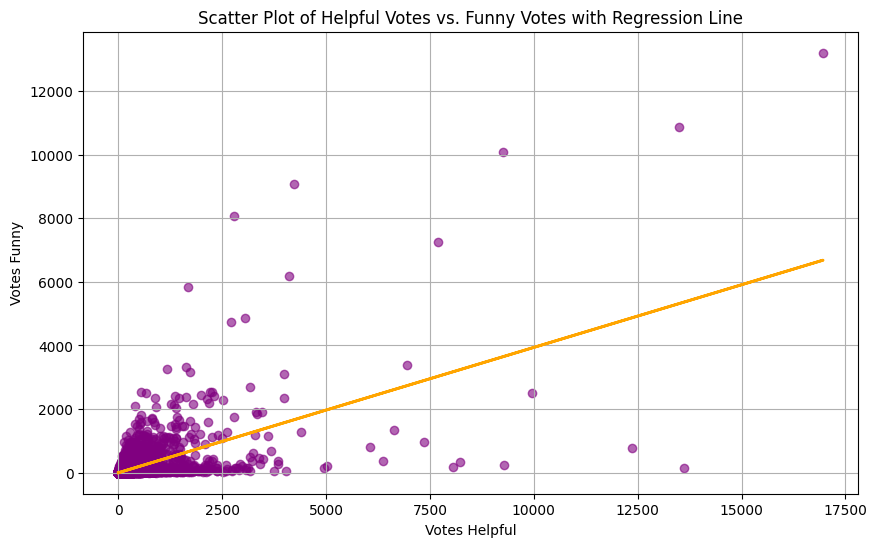

In [206]:
# Assuming df_clean is your DataFrame with 'votes_helpful' and 'votes_funny'

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['votes_helpful'], df_clean['votes_funny'], alpha=0.6, color='purple')

# Perform linear regression
slope, intercept = np.polyfit(df_clean['votes_helpful'], df_clean['votes_funny'], 1)
regression_line = slope * df_clean['votes_helpful'] + intercept

# Plot regression line
plt.plot(df_clean['votes_helpful'], regression_line, color='orange', linewidth=2)

# Labels and title
plt.title('Scatter Plot of Helpful Votes vs. Funny Votes with Regression Line')
plt.xlabel('Votes Helpful')
plt.ylabel('Votes Funny')
plt.grid(True)
plt.show()


In [207]:
df_clean[df_clean['votes_funny'] == max(df_clean['votes_funny'])]["review"]

7169361    get friend\ngift friend game\nplay game\nargue...
Name: review, dtype: object

In [208]:
comment = df_clean[df_clean['votes_funny'] == max(df_clean['votes_funny'])]["review"].values[0]
game = df_clean[df_clean['votes_funny'] == max(df_clean['votes_funny'])]["app_name"].values[0]
votes = max(df_clean['votes_funny'])
print(f"Funniest comment: \n Game: {game} \n Votes: {votes} \n Comment: {comment}")

Funniest comment: 
 Game: Among Us 
 Votes: 13202 
 Comment: get friend
gift friend game
play game
argue for 2 minutes on why you're not imposter
you're imposter
lose friend
get other friend
11/10


In [209]:
comment = df_clean[df_clean['votes_helpful'] == max(df_clean['votes_helpful'])]["review"].values[0]
game = df_clean[df_clean['votes_helpful'] == max(df_clean['votes_helpful'])]["app_name"].values[0]
votes = max(df_clean['votes_helpful'])
print(f"Most helpful comment: \n Game: {game} \n Votes: {votes} \n Comment: {comment}")

Most helpful comment: 
 Game: Among Us 
 Votes: 16960 
 Comment: get friend
gift friend game
play game
argue for 2 minutes on why you're not imposter
you're imposter
lose friend
get other friend
11/10


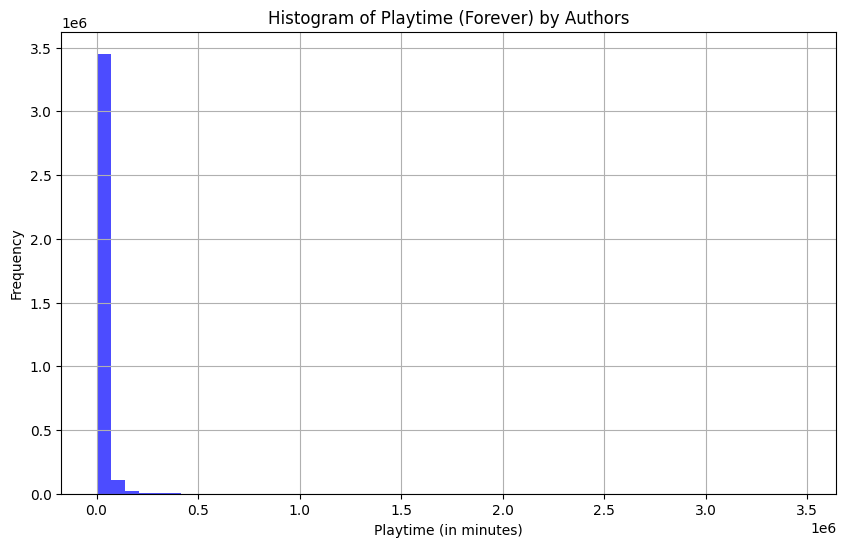

In [210]:
plt.figure(figsize=(10, 6))
plt.hist(df_clean['author.playtime_forever'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Playtime (Forever) by Authors')
plt.xlabel('Playtime (in minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [211]:
df_clean['author.playtime_forever'].sort_values().tail(10)

1579150     2248338.0
955236      2377611.0
987574      2400376.0
1575305     2427659.0
607254      2447252.0
21088199    2509321.0
17327193    2585915.0
1567522     2884967.0
541372      3336152.0
1576588     3470649.0
Name: author.playtime_forever, dtype: float64

In [212]:
import pandas as pd
import plotly.express as px

# Convert 'timestamp_created' to datetime
df_clean['timestamp_updated'] = pd.to_datetime(df_clean['timestamp_updated'], unit='s')

# Extract year and month for grouping
df_clean['year_month'] = df_clean['timestamp_updated'].dt.to_period('M').astype(str)  # Convert Period to string

# Group by app_name and year_month to get reviews per game over time
reviews_per_game = df_clean.groupby(['app_name', 'year_month']).size().reset_index(name='review_count')

# Plot reviews over the year with Plotly (interactive)
fig = px.line(reviews_per_game, x='year_month', y='review_count', color='app_name',
              title='Reviews Per Game Over Time',
              labels={'year_month': 'Year-Month', 'review_count': 'Number of Reviews'})
fig.update_layout(xaxis_title='Year-Month', yaxis_title='Number of Reviews', hovermode="x unified")
fig.show()


c:\Users\Markus\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



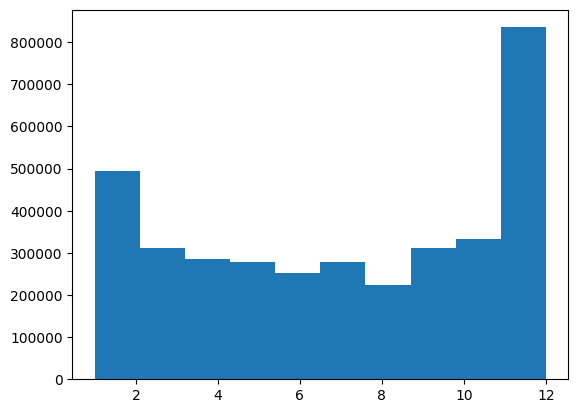

In [213]:
plt.hist(df_clean['timestamp_updated'].dt.month)
plt.show()

In [214]:
df_clean_na = df_clean[~df_clean["review"].isna()]

In [215]:
letter_count = [len(review) for review in df_clean_na["review"]]
letter_count

[342,
 3,
 40,
 69,
 2,
 27,
 15,
 70,
 9,
 10,
 163,
 33,
 1,
 48,
 154,
 7,
 10,
 29,
 265,
 28,
 26,
 7,
 3,
 95,
 402,
 86,
 22,
 29,
 27,
 85,
 240,
 40,
 139,
 115,
 118,
 29,
 42,
 26,
 19,
 70,
 21,
 57,
 11,
 253,
 262,
 85,
 20,
 27,
 39,
 20,
 9,
 18,
 4,
 4,
 326,
 417,
 57,
 6,
 27,
 286,
 514,
 72,
 246,
 85,
 4,
 193,
 80,
 3,
 24,
 8,
 13,
 13,
 3,
 82,
 27,
 89,
 86,
 37,
 16,
 71,
 114,
 41,
 48,
 51,
 331,
 51,
 4,
 9,
 16,
 13,
 10,
 5,
 46,
 34,
 46,
 202,
 28,
 114,
 16,
 225,
 14,
 24,
 5,
 21,
 56,
 1238,
 82,
 1,
 134,
 41,
 63,
 13,
 7,
 33,
 12,
 34,
 69,
 9,
 156,
 18,
 3,
 463,
 22,
 233,
 9,
 94,
 44,
 4,
 135,
 3,
 1270,
 389,
 45,
 13,
 173,
 32,
 207,
 11,
 82,
 26,
 31,
 141,
 11,
 10,
 11,
 21,
 129,
 34,
 3,
 36,
 9,
 14,
 26,
 4,
 69,
 17,
 39,
 11,
 30,
 17,
 124,
 34,
 9,
 251,
 4,
 15,
 28,
 3,
 27,
 118,
 16,
 9,
 50,
 12,
 55,
 494,
 36,
 32,
 10,
 14,
 472,
 215,
 8,
 18,
 32,
 19,
 73,
 11,
 9,
 108,
 37,
 8,
 61,
 41,
 260,
 8,
 22,
 93,
 8,

In [216]:
letter_count_series = pd.Series(letter_count)

In [217]:
letter_count_series[~letter_count_series < 3]

0          342
1            3
2           40
3           69
4            2
          ... 
3590401     15
3590402     10
3590403    347
3590404     38
3590405    443
Length: 3590406, dtype: int64

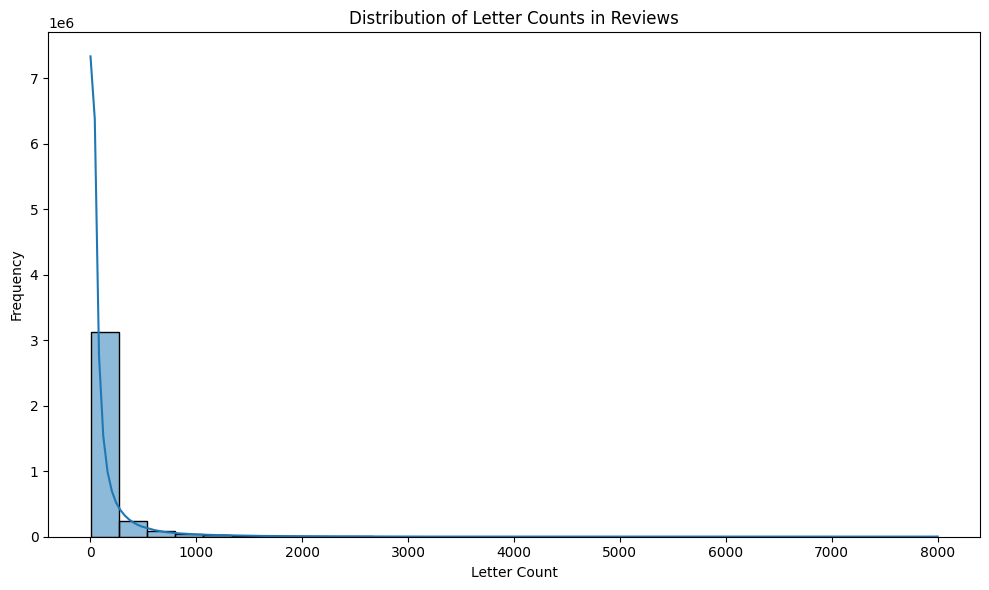

In [218]:
plt.figure(figsize=(10, 6))

# Create a histogram with Seaborn
sns.histplot(letter_count_series[~letter_count_series < 3], bins=30, kde=True)

# Add labels and title
plt.xlabel('Letter Count')
plt.ylabel('Frequency')
plt.title('Distribution of Letter Counts in Reviews')

# Show the plot
plt.tight_layout()
plt.show()

In [219]:
# Tokenising
tokens = [list(tokenize(sentence)) for sentence in df_clean_na["review"].values]

In [220]:
word_counts = [len(review) for review in tokens]
word_counts

[68,
 1,
 9,
 13,
 1,
 3,
 3,
 14,
 2,
 3,
 28,
 8,
 1,
 7,
 29,
 2,
 2,
 1,
 53,
 5,
 6,
 2,
 1,
 17,
 67,
 16,
 4,
 7,
 5,
 19,
 41,
 7,
 27,
 23,
 22,
 7,
 7,
 3,
 4,
 10,
 4,
 12,
 3,
 48,
 51,
 17,
 4,
 6,
 8,
 4,
 2,
 4,
 1,
 1,
 1,
 78,
 10,
 1,
 6,
 49,
 89,
 15,
 43,
 16,
 1,
 34,
 16,
 1,
 5,
 2,
 2,
 2,
 1,
 14,
 6,
 15,
 15,
 8,
 2,
 14,
 26,
 8,
 10,
 7,
 2,
 9,
 1,
 2,
 3,
 2,
 1,
 0,
 8,
 6,
 9,
 41,
 7,
 21,
 3,
 41,
 2,
 5,
 1,
 4,
 9,
 184,
 15,
 0,
 26,
 10,
 15,
 3,
 2,
 4,
 3,
 7,
 9,
 2,
 32,
 4,
 1,
 88,
 2,
 46,
 2,
 19,
 1,
 1,
 21,
 1,
 250,
 73,
 7,
 2,
 33,
 5,
 42,
 2,
 14,
 5,
 8,
 25,
 2,
 2,
 1,
 3,
 24,
 8,
 1,
 6,
 2,
 2,
 4,
 1,
 13,
 4,
 9,
 2,
 5,
 3,
 25,
 6,
 1,
 45,
 1,
 4,
 5,
 1,
 5,
 19,
 4,
 2,
 8,
 2,
 10,
 84,
 8,
 5,
 2,
 3,
 90,
 43,
 2,
 3,
 8,
 4,
 12,
 2,
 2,
 19,
 7,
 1,
 12,
 7,
 50,
 0,
 5,
 16,
 2,
 2,
 4,
 2,
 46,
 25,
 346,
 2,
 2,
 2,
 19,
 1,
 1,
 23,
 4,
 13,
 0,
 1,
 0,
 2,
 14,
 30,
 3,
 769,
 40,
 6,
 7,
 45,
 36,
 28,
 5,


In [221]:
word_counts_series = pd.Series(word_counts)

In [222]:
word_counts_series[word_counts_series != 0]

0          68
1           1
2           9
3          13
4           1
           ..
3590401     3
3590402     2
3590403    68
3590404     8
3590405    81
Length: 3536326, dtype: int64

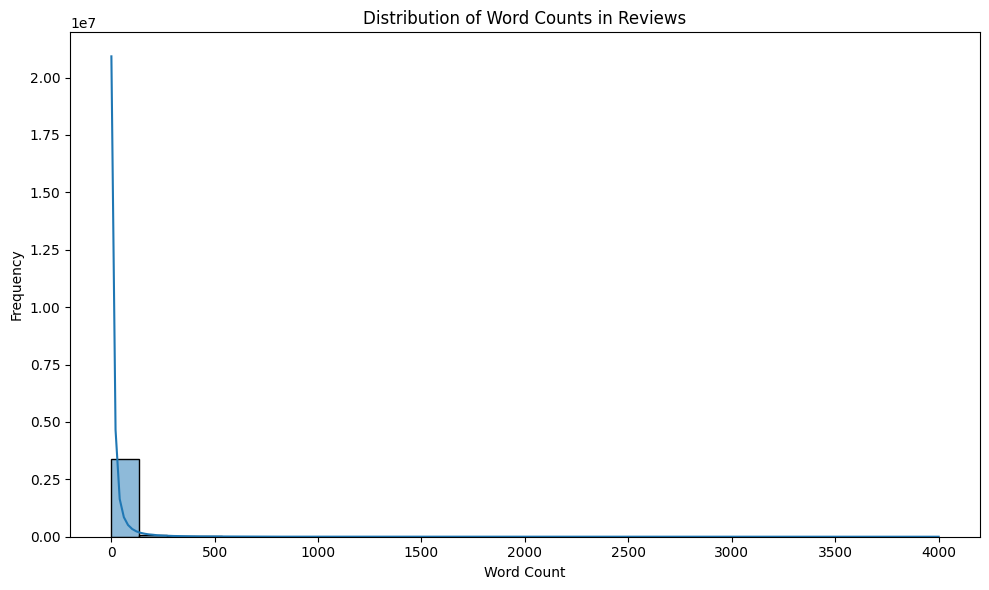

In [223]:
# Assuming 'word_counts' contains the word counts of each review
plt.figure(figsize=(10, 6))

# Create a histogram with Seaborn
sns.histplot(word_counts_series[word_counts_series != 0], bins=30, kde=True)

# Add labels and title
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Reviews')

# Show the plot
plt.tight_layout()
plt.show()

In [224]:
tokens_2 = list(itertools.chain(*tokens))

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in tokens_2 if word.lower() not in stop_words]

word_frequencies = Counter(filtered_words)
most_common_words = word_frequencies.most_common(20)
most_common_words



[('game', 2757273),
 ('fun', 653654),
 ('good', 629676),
 ('like', 503000),
 ('play', 497685),
 ('get', 355115),
 ('time', 314969),
 ('games', 300254),
 ('great', 298339),
 ('really', 294653),
 ('one', 288325),
 ('best', 223273),
 ('much', 216457),
 ('played', 216109),
 ('would', 212810),
 ('hours', 211805),
 ('friends', 210408),
 ('even', 209327),
 ('story', 208862),
 ('playing', 197909)]

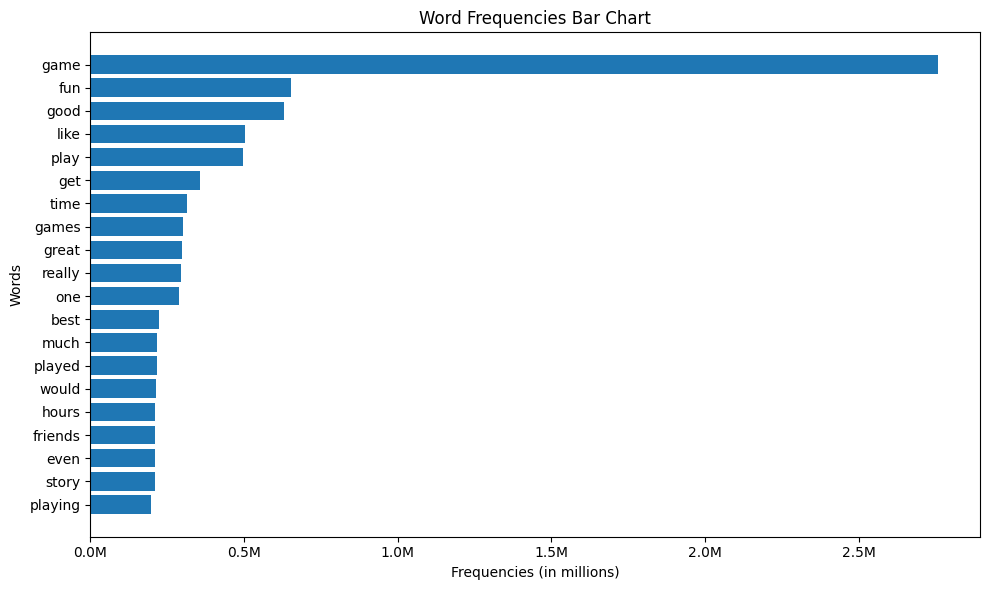

In [225]:
words, frequencies = zip(*most_common_words)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(words[::-1], frequencies[::-1])  # Use the sorted lists

# Add labels and title
plt.ylabel('Words')
plt.xlabel('Frequencies (in millions)')  # Label for frequencies in millions
plt.title('Word Frequencies Bar Chart')

# Formatting the x-axis to show values like 0.5M, 1M, 1.5M, etc.
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}M".format(x/1e6)))

# Show the plot
plt.tight_layout()
plt.show()

In [232]:

text = '\n'.join(pd.Series(filtered_words).str.lower().values)

Something went wrong here

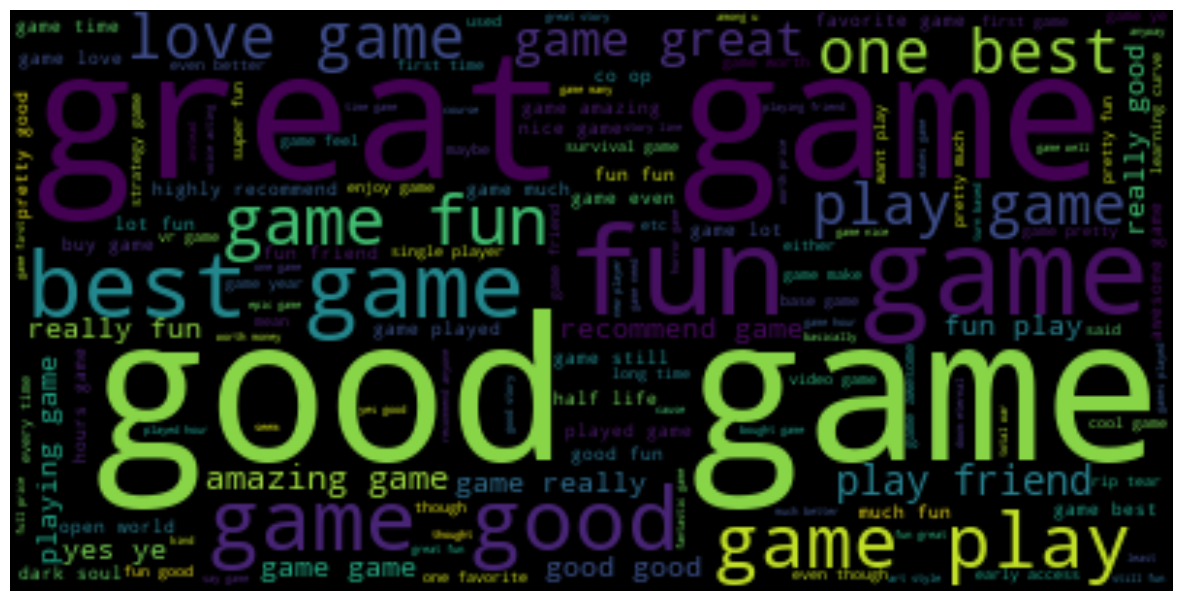

In [233]:
# Generate word cloud
wc = wordcloud.WordCloud().generate(text)

# Showing word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [234]:

text_2 = '\n'.join(df_clean_na["review"].str.lower().values)

In [237]:
wc = wordcloud.WordCloud().generate(text)

# Showing word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()